In [5]:
import pandas as pd
import numpy as np

from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución Normal

La formula de la distribución normal es:
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

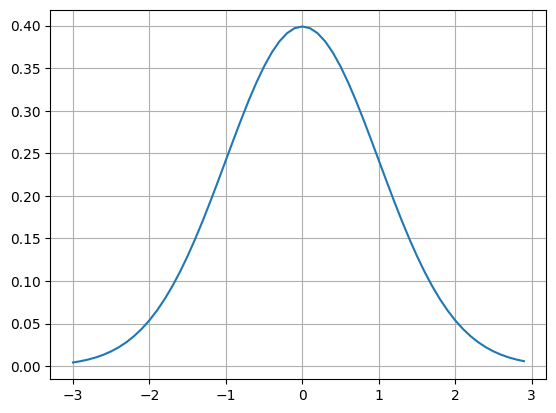

In [15]:
x = np.arange(-3, 3, 0.1)
mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.plot(x, y)
plt.grid()
plt.show()

## Simulación

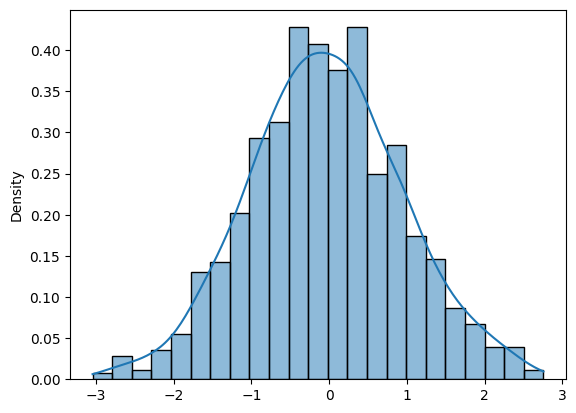

In [13]:
normal = norm.rvs(size=1000, random_state=0)

sns.histplot(normal, kde=True, stat="density")
plt.show()

In [14]:
print(f'median: {np.median(normal)}, variance: {np.var(normal)}')

median: -0.058028034799627745, variance: 0.9742344563121542


## Dos variables aleatorias normales

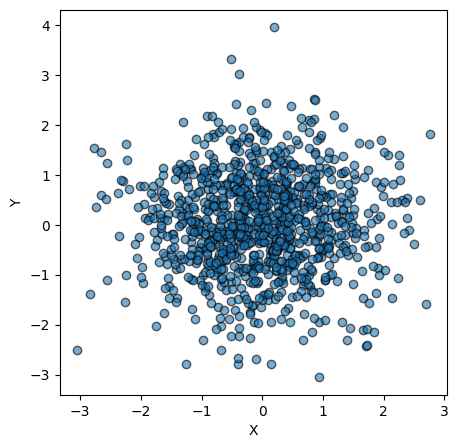

In [24]:
X = norm.rvs(size=1000, random_state=0)
Y = norm.rvs(size=1000, random_state=1)

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X, Y, edgecolor='black', alpha=0.6)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Text(0.5, 0, 'X')

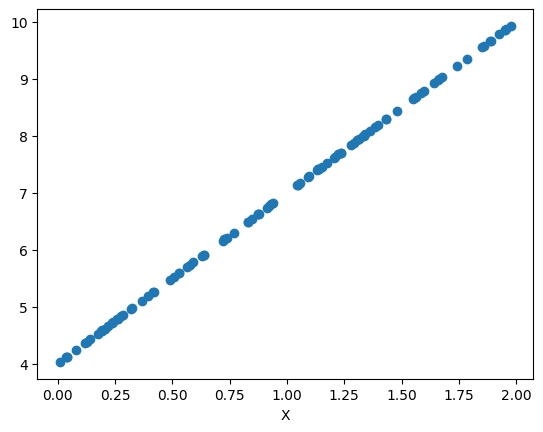

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos aleatorios
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X

# graficar
plt.scatter(X, y)
plt.xlabel('X')

In [35]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [36]:
# Evaluar los modelos
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'MSE: {mean_squared_error(y, y_pred)}')
print(f'MAE: {np.mean(np.abs(y - y_pred))}')
print(f'R2: {r2_score(y, y_pred)}')


RMSE: 1.7696829641852286e-15
MSE: 3.131777793727417e-30
MAE: 1.7141843500212416e-15
R2: 1.0


Agregamos solo un outlier

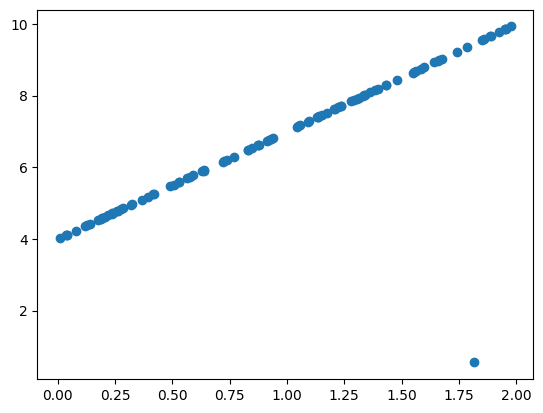

In [62]:
def agregar_outliers(X, y, N, x_range=(1, 3), y_range=(0, 10)):
    """
    Agrega N outliers aleatorios a los datos X e y.

    Parameters:
    X (numpy.ndarray): Datos originales de X.
    y (numpy.ndarray): Datos originales de y.
    N (int): Número de outliers a agregar.
    x_range (tuple): Rango de valores para los outliers en X.
    y_range (tuple): Rango de valores para los outliers en y.

    Returns:
    numpy.ndarray: Nuevos datos de X con outliers.
    numpy.ndarray: Nuevos datos de y con outliers.
    """
    np.random.seed(40)  # Para reproducibilidad
    X_outliers = np.random.uniform(x_range[0], x_range[1], size=(N, 1))
    y_outliers = np.random.uniform(y_range[0], y_range[1], size=(N, 1))

    X_new = np.vstack((X, X_outliers))
    y_new = np.vstack((y, y_outliers))

    return X_new, y_new

# Ejemplo de uso
X_outliers, y_outliers = agregar_outliers(X, y, 1)

# Graficar
plt.scatter(X_outliers, y_outliers)


In [63]:
model = LinearRegression()
model.fit(X_outlier, y_outlier)
y_pred = model.predict(X_outlier)

In [64]:
# Evaluar los modelos
print(f'RMSE: {np.sqrt(mean_squared_error(y_outlier, y_pred))}')
print(f'MSE: {mean_squared_error(y_outlier, y_pred)}')
print(f'MAE: {np.mean(np.abs(y_outlier - y_pred))}')
print(f'R2: {r2_score(y_outlier, y_pred)}')


RMSE: 0.4033114496392875
MSE: 0.16266012541014352
MAE: 0.3436236942771855
R2: 0.9923368115678077
